In [1]:
import numpy as np
import pickle
# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns
import os
# for visualization and to display plots
from matplotlib import pyplot as plt

# import color maps

from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

from imblearn.over_sampling import SMOTE

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification


In [3]:
df=pd.read_csv('C:\\Users\\91745\\Documents\\dbms\\indian_liver_patient.csv')
df2 = pd.DataFrame(df)
df2 = df2.drop_duplicates()
## if score==negative, mark 0 ;else 1 
def partition(x):  
    if x == 2:
        return 0  
    return 1
df2['Dataset'] = df2['Dataset'].map(partition)
## if score==negative, mark 0 ;else 1 
df2['Gender']
def partition2(x):
    if x =='Male':        
        return 0    
    return 1
df2['Gender'] = df2['Gender'].map(partition2)
df2


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df2 = df2.dropna(subset=['Total_Bilirubin'])
df2 = df2.dropna(subset=['Direct_Bilirubin'])
df2 = df2.dropna(subset=['Alkaline_Phosphotase'])
df2 = df2.dropna(subset=['Alamine_Aminotransferase'])
df2 = df2.dropna(subset=['Aspartate_Aminotransferase'])
df2 = df2.dropna(subset=['Total_Protiens'])
df2 = df2.dropna(subset=['Albumin'])
df2 = df2.dropna(subset=['Albumin_and_Globulin_Ratio'])
df2 = df2.dropna(subset=['Gender'])
df2 = df2.dropna(subset=['Dataset'])
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
# Create separate object for target variable
y = df2.Dataset

# Create separate object for input features
X = df2.drop('Dataset', axis=1)


# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1234)
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(424, 10) (142, 10) (424,) (142,)


In [7]:
smote2 = SMOTE(random_state=42)
X_train1, y_train1 = smote2.fit_resample(X_train, y_train)

# Print the class distribution before and after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train1.value_counts())
print(X_train1.shape,y_train1.shape)


Before SMOTE: 1    299
0    125
Name: Dataset, dtype: int64
After SMOTE: 0    299
1    299
Name: Dataset, dtype: int64
(598, 10) (598,)


## Random Forest

In [9]:
#Random Forest
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'max_features':['auto','sqrt','log2'],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_classifier = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
rf_classifier.fit(X_train1, y_train1)
y_train_pred = rf_classifier.predict(X_train1)
y_pred = rf_classifier.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
print("Random Forest Accuracy: " + str(rf_acc))

# Get just the prediction for the positive class (1)
y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]
cnf=confusion_matrix(y_test,y_pred).T
print(cnf)
# print("y pred prob",y_pred_proba)


#values and scores
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)

#Model Accuracy
rf_model=(rf_classifier.score(X_test, y_test)*100)
print("The accuracy score achieved using Random Forest is "+str(rf_model)+" %")

    

Random Forest Accuracy: 75.35211267605634
[[21 19]
 [16 86]]
Precision: 0.8431372549019608
Recall: 0.819047619047619
Specificity: 0.5675675675675675
F1 Score: 0.8309178743961353
The accuracy score achieved using Random Forest is 78.5971685971686 %


In [11]:
print(rf_classifier)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')


In [10]:
#Random Forest
from sklearn.model_selection import cross_val_score

tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'max_features':['auto','sqrt','log2'],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

cl=RandomForestClassifier(n_estimators=85, criterion='gini',random_state=10,max_features='sqrt')
mudel = cl.fit(X_train1,y_train1)

score=cross_val_score(mudel,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

y_pred = mudel.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
print("Random Forest Accuracy: " + str(rf_acc))

cnf=confusion_matrix(y_test,y_pred).T
print(cnf)
#values and scores
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("\n")



#Model Accuracy
rf_model=(mudel.score(X_test, y_test)*100)
print("The accuracy score achieved using Random Forest is "+str(rf_model)+" %")

    

max accuracy  89.83 %
mean accuracy  81.44 %
Random Forest Accuracy: 76.05633802816901
[[22 19]
 [15 86]]
Precision: 0.8514851485148515
Recall: 0.819047619047619
Specificity: 0.5945945945945946
F1 Score: 0.8349514563106796


The accuracy score achieved using Random Forest is 76.05633802816901 %


In [ ]:
print()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")


cnf=confusion_matrix(y_test,y_pred).T
print(cnf)
#values and scores
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("\n")



#Model Accuracy
rf_model=(best_model.score(X_test, y_test)*100)
print("The accuracy score achieved using Random Forest is "+str(rf_model)+" %")

    


Accuracy: 0.7535211267605634
max accuracy  89.83 %
mean accuracy  79.44 %
[[21 19]
 [16 86]]
Precision: 0.8431372549019608
Recall: 0.819047619047619
Specificity: 0.5675675675675675
F1 Score: 0.8309178743961353


The accuracy score achieved using Random Forest is 75.35211267605634 %


## MLP


In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=2500)

# Train the classifier using backpropagation
mlp.fit(X_train1, y_train1)

# Predict the class labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("Sensitivity:", sensitivity)

Accuracy: 0.6056338028169014
[[36  1]
 [55 50]]
Precision: 0.9803921568627451
Recall: 0.47619047619047616
Specificity: 0.972972972972973
F1 Score: 0.641025641025641
Sensitivity: 0.47619047619047616


## MLP hyper parameter tuning


In [22]:
# Define the MLP classifier
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'activation': ['logistic', 'relu'],
              'learning_rate': ['constant', 'adaptive'],
              'alpha': [0.0001, 0.001, 0.01]}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters from the GridSearchCV object
best_params = grid_search.best_params_

# Train the MLP classifier with the best hyperparameters
mlp_clf = MLPClassifier(**best_params)
mlp_clf.fit(X_train1, y_train1)



score=cross_val_score(mlp_clf,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")


# Make predictions on the test data
y_pred = mlp_clf.predict(X_test)

# Calculate accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("Sensitivity:", sensitivity)

max accuracy  81.67 %
mean accuracy  70.42 %
Accuracy score: 0.7464788732394366
[[30  7]
 [29 76]]
Precision: 0.9156626506024096
Recall: 0.7238095238095238
Specificity: 0.8108108108108109
F1 Score: 0.8085106382978723
Sensitivity: 0.7238095238095238


In [13]:
print(best_params)

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive'}


In [23]:
print(best_params)

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive'}


In [ ]:
# scalling the dataset

# gradient boosting


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'learning_rate': [0.05, 0.1, 0.2]}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters from the GridSearchCV object
best_params = grid_search.best_params_

# Train the Gradient Boosting classifier with the best hyperparameters
gb_clf = GradientBoostingClassifier(**best_params)
gb_clf.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Calculate accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print(confusion_matrix(y_test,y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


Accuracy score: 0.7323943661971831
[[20 17]
 [21 84]]
Precision: 0.8316831683168316
Recall: 0.8
Specificity: 0.5405405405405406
F1 Score: 0.8155339805825242


# logistic regression

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


# Define the Logistic Regression model
model = LogisticRegression()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Accuracy: %.2f" % (accuracy * 100))


# Calculate accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print(confusion_matrix(y_test,y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


Accuracy: 70.42
Accuracy score: 0.704225352112676
[[30  7]
 [35 70]]
Precision: 0.9090909090909091
Recall: 0.6666666666666666
Specificity: 0.8108108108108109
F1 Score: 0.7692307692307692


# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the SVM model
model = SVC()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % (accuracy * 100))


score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

rf_acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
print("Random Forest Accuracy: " + str(rf_acc))

cnf=confusion_matrix(y_test,y_pred).T
print(cnf)
#values and scores
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("\n")


In [40]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cnf=confusion_matrix(y_test,y_pred).T
print(cnf)
#values and scores
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("\n")


Accuracy: 0.6971830985915493
[[33 39]
 [ 4 66]]
Precision: 0.9428571428571428
Recall: 0.6285714285714286
Specificity: 0.8918918918918919
F1 Score: 0.7542857142857143




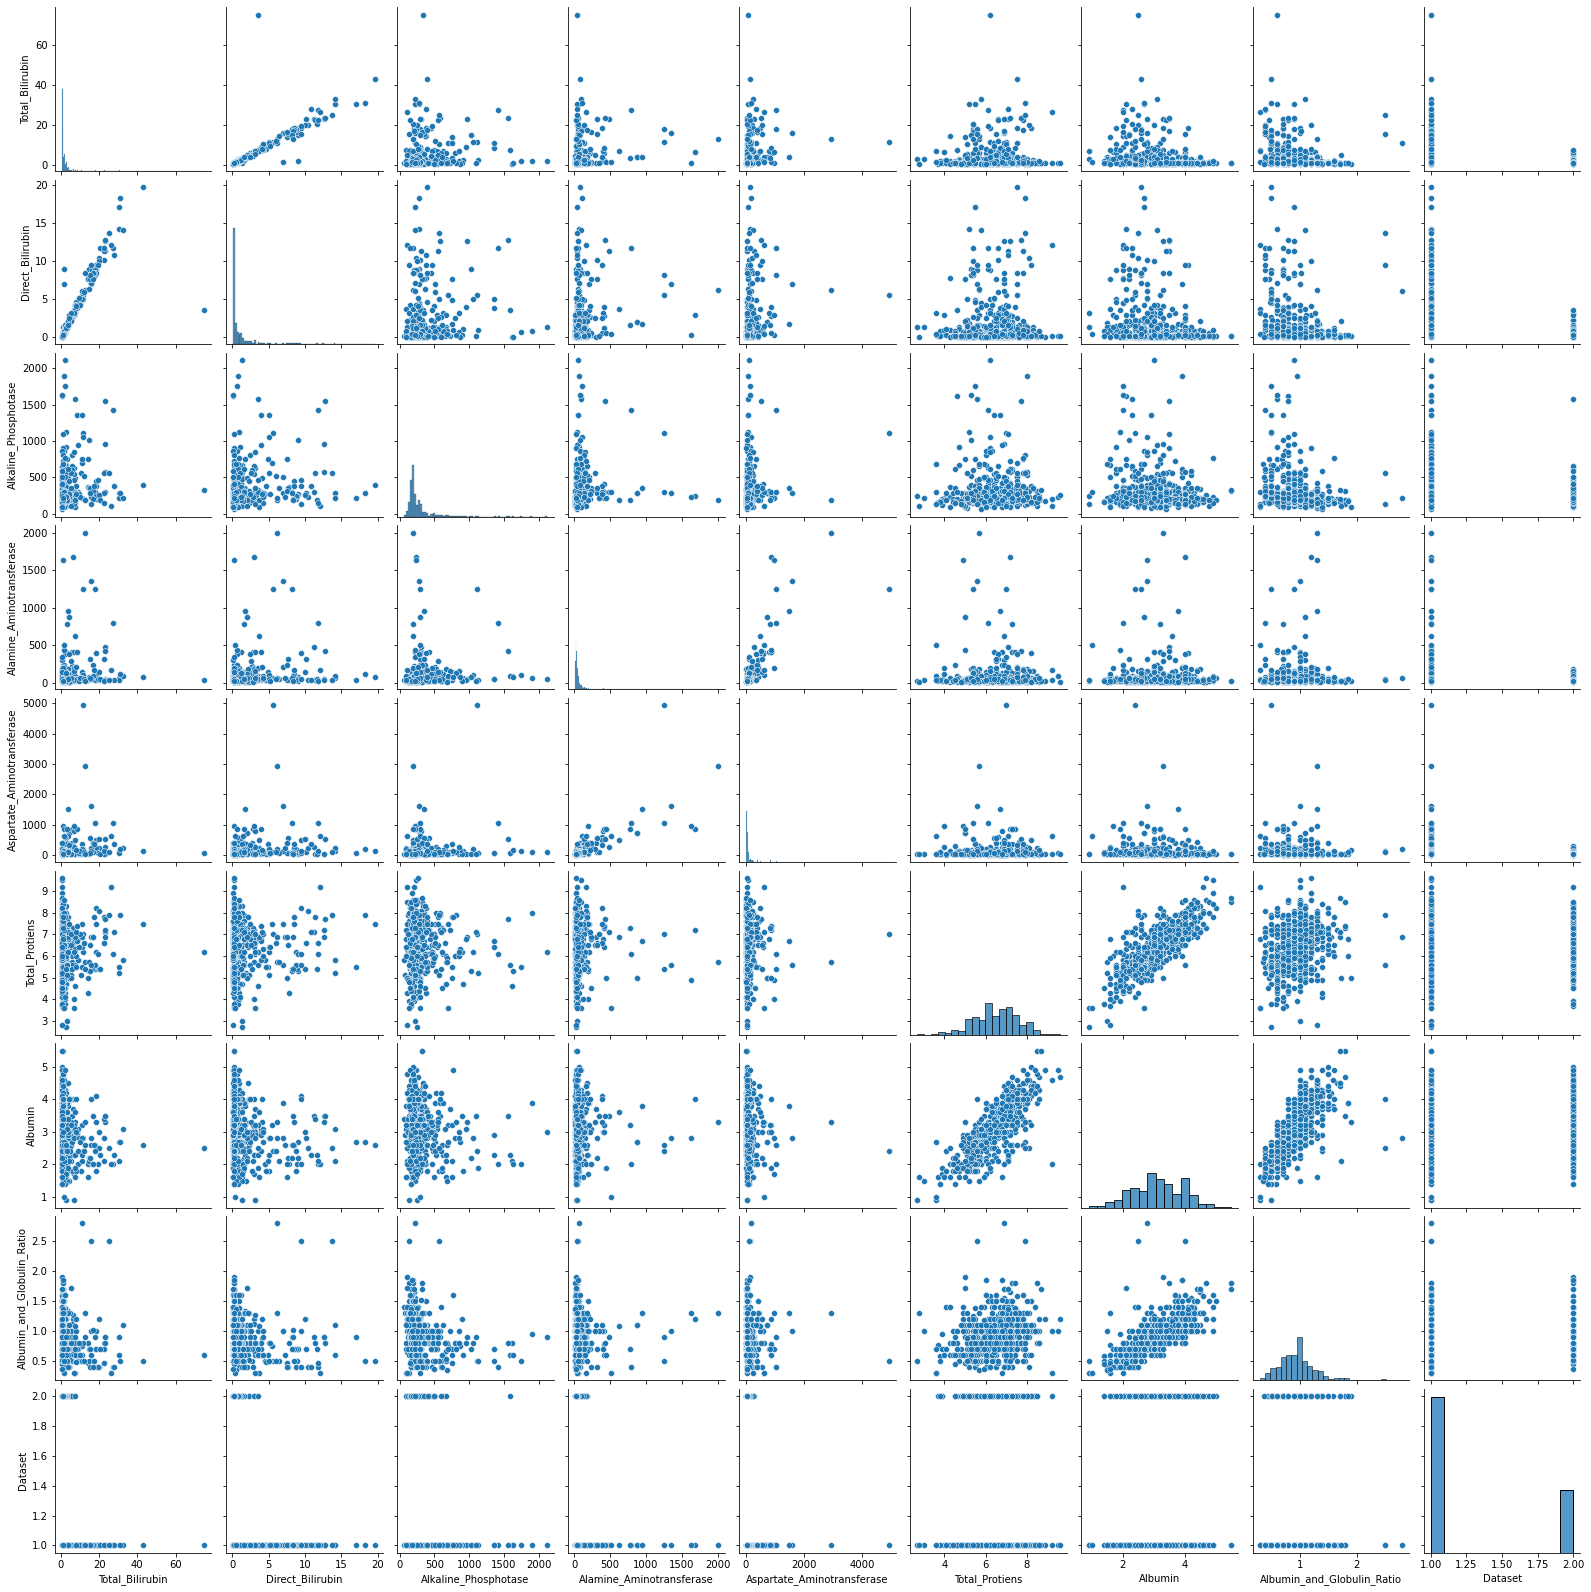

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df=pd.read_csv('C:\\Users\\91745\\Documents\\dbms\\indian_liver_patient.csv')

# Select 10 features
features = ['Total_Bilirubin',
'Direct_Bilirubin',
'Alkaline_Phosphotase',
'Alamine_Aminotransferase',
'Aspartate_Aminotransferase',
'Total_Protiens',
'Albumin',
'Albumin_and_Globulin_Ratio',
'Gender','Dataset']

# Create a pair plot using Seaborn
sns.pairplot(df[features])

# Show the plot
plt.show()


# # Select 10 features
# features = [df2['Total_Bilirubin'],
# df2['Direct_Bilirubin'],
# df2['Alkaline_Phosphotase'],
# df2['Alamine_Aminotransferase'],
# df2['Aspartate_Aminotransferase'],
# df2['Total_Protiens'],
# df2['Albumin'],
# df2['Albumin_and_Globulin_Ratio'],
# df2['Gender'],
# df2['Dataset']]


In [32]:
X_train1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,-1.514511,1.774660,-0.415774,-0.449921,-0.368477,-0.357260,-0.411542,-0.384505,-0.202436,-0.164872
1,1.806650,1.774660,-0.333795,-0.374860,-0.316128,-0.297097,-0.323080,1.490482,1.204659,0.148186
2,1.437632,-0.562159,-0.219024,-0.337330,-0.590958,-0.321162,-0.364709,-0.009508,1.076741,2.026535
3,-0.284451,-0.562159,-0.202628,-0.149679,-0.241968,-0.333195,-0.192989,-2.071994,-1.993283,-1.104047
4,0.269076,-0.562159,0.125289,0.263154,-0.425188,-0.038396,0.462670,0.365490,-0.202436,-0.790989
...,...,...,...,...,...,...,...,...,...,...
593,-0.147662,-0.562159,-0.399379,-0.449921,-0.388497,-0.055424,-0.308052,-0.707773,-0.984276,-0.779295
594,-0.930721,-0.562159,-0.330845,-0.387172,-0.548119,-0.298275,-0.358735,-0.306132,-0.202436,-0.134064
595,-0.391235,-0.562159,-0.376556,-0.449921,-0.517741,-0.280635,-0.368121,-0.384505,-0.202436,-0.107766
596,0.696843,-0.562159,-0.242125,-0.209391,-0.447390,-0.107844,-0.095284,-0.341969,0.646402,1.528444


# using lstm model

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset (assuming it's stored in a CSV file)
dataset = df2

# Extract features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature values between 0 and 1



scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to be in the form [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 10)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/100
15/15 [==============================] - 14s 16ms/step - loss: 0.6731 - accuracy: 0.7367
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6402 - accuracy: 0.7345
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6138 - accuracy: 0.7345
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5941 - accuracy: 0.7345
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5804 - accuracy: 0.7345
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5705 - accuracy: 0.7345
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5654 - accuracy: 0.7345
Epoch 8/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5621 - accuracy: 0.7345
Epoch 9/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5583 - accuracy: 0.7345
Epoch 10/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5547 - accuracy: 0.734

In [49]:
X_train1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,20,1,0.600000,0.200000,202,12,13,6.100000,3.000000,0.900000
1,74,1,1.100000,0.400000,214,22,30,8.100000,4.100000,1.000000
2,68,0,1.800000,0.500000,151,18,22,6.500000,4.000000,1.600000
3,40,0,1.900000,1.000000,231,16,55,4.300000,1.600000,0.600000
4,49,0,3.900000,2.100000,189,65,181,6.900000,3.000000,0.700000
...,...,...,...,...,...,...,...,...,...,...
593,54,0,0.796265,0.200000,224,14,23,6.043973,3.255178,1.185059
594,40,0,0.867196,0.200000,165,26,29,8.106352,4.170372,0.993439
595,27,0,0.839195,0.269597,160,26,26,6.656779,3.974364,1.475021
596,60,0,1.372838,0.554628,190,56,68,5.940895,3.663581,1.584029


# adaboosting


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train1, y_train1)

# Use the trained model for prediction
predictions = best_model.predict(X_test)

print("Best Hyperparameters:", best_params)
# print("Predictions:", predictions)

score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)

print(confusion_matrix(y_test,predictions))

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
max accuracy  76.67 %
mean accuracy  70.08 %
Accuracy: 69.72%
Precision: 0.8875
Recall: 0.6761904761904762
Specificity: 0.7567567567567568
F1 Score: 0.7675675675675676
[[28  9]
 [34 71]]


In [25]:
print(best_params)

{'learning_rate': 0.1, 'n_estimators': 200}


In [26]:
print(best_model)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)


# Gradient Boosting Machines (GBM)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Create a GBM classifier
gbm = GradientBoostingClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a GBM classifier with the best hyperparameters
best_gbm = GradientBoostingClassifier(**best_params)

# Fit the model on the training data
best_gbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_gbm.predict(X_test)


score=cross_val_score(best_gbm,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print(confusion_matrix(y_test,y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
max accuracy  91.53 %
mean accuracy  80.12 %
Accuracy: 0.7112676056338029
Precision: 0.7807017543859649
Recall: 0.8476190476190476
Specificity: 0.32432432432432434
F1 Score: 0.8127853881278538
[[12 25]
 [16 89]]


# Stochastic Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 0.9],
    'max_depth': [3, 5, 7]
}

# Initialize the SGB classifier
sgb = GradientBoostingClassifier(loss='deviance')

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=sgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        37
           1       0.83      0.81      0.82       105

    accuracy                           0.74       142
   macro avg       0.67      0.68      0.67       142
weighted avg       0.75      0.74      0.74       142

max accuracy  93.22 %
mean accuracy  80.12 %
Accuracy: 0.7394366197183099
Precision: 0.8333333333333334
Recall: 0.8095238095238095
Specificity: 0.5405405405405406
F1 Score: 0.8212560386473431
[[20 17]
 [20 85]]


# cat boosting 

In [ ]:
!pip install catboost

In [25]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
# data = pd.read_csv('your_dataset.csv')

# Split the data into features and target variable
# X = data.drop('target', axis=1)
# y = data['target']

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Create the CatBoost classifier
catboost = CatBoostClassifier()

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(catboost, param_grid, cv=5, scoring='precision', n_iter=10, random_state=42)
random_search.fit(X_train1, y_train1)

# Print the best parameters found during hyperparameter tuning
# print("Best Parameters: ", random_search.best_params_)

# Get the best CatBoost model from the search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)


score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

print(classification_report(y_test, y_pred))


# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print(confusion_matrix(y_test,y_pred))

0:	learn: 0.6911685	total: 16.1ms	remaining: 1.6s
1:	learn: 0.6890644	total: 17.5ms	remaining: 856ms
2:	learn: 0.6873224	total: 18.8ms	remaining: 607ms
3:	learn: 0.6857898	total: 20ms	remaining: 480ms
4:	learn: 0.6842761	total: 20.9ms	remaining: 398ms
5:	learn: 0.6822994	total: 22.2ms	remaining: 347ms
6:	learn: 0.6805376	total: 23.1ms	remaining: 307ms
7:	learn: 0.6786799	total: 24ms	remaining: 276ms
8:	learn: 0.6770730	total: 24.9ms	remaining: 252ms
9:	learn: 0.6753229	total: 25.8ms	remaining: 232ms
10:	learn: 0.6734814	total: 26.8ms	remaining: 216ms
11:	learn: 0.6722215	total: 27.7ms	remaining: 203ms
12:	learn: 0.6706810	total: 28.6ms	remaining: 192ms
13:	learn: 0.6690336	total: 29.4ms	remaining: 181ms
14:	learn: 0.6678118	total: 30.2ms	remaining: 171ms
15:	learn: 0.6662452	total: 31ms	remaining: 163ms
16:	learn: 0.6644284	total: 31.9ms	remaining: 156ms
17:	learn: 0.6630473	total: 32.8ms	remaining: 149ms
18:	learn: 0.6616900	total: 33.6ms	remaining: 143ms
19:	learn: 0.6600115	total: 3

13:	learn: 0.6721095	total: 11.3ms	remaining: 69.7ms
14:	learn: 0.6708229	total: 12.2ms	remaining: 69.3ms
15:	learn: 0.6694126	total: 13ms	remaining: 68.5ms
16:	learn: 0.6681448	total: 13.8ms	remaining: 67.5ms
17:	learn: 0.6667847	total: 14.7ms	remaining: 66.8ms
18:	learn: 0.6657012	total: 15.4ms	remaining: 65.6ms
19:	learn: 0.6640946	total: 16.1ms	remaining: 64.6ms
20:	learn: 0.6627028	total: 16.9ms	remaining: 63.7ms
21:	learn: 0.6615728	total: 17.7ms	remaining: 62.7ms
22:	learn: 0.6602148	total: 18.6ms	remaining: 62.3ms
23:	learn: 0.6589783	total: 19ms	remaining: 60.2ms
24:	learn: 0.6577946	total: 19.8ms	remaining: 59.4ms
25:	learn: 0.6563773	total: 20.6ms	remaining: 58.6ms
26:	learn: 0.6550582	total: 21.3ms	remaining: 57.7ms
27:	learn: 0.6536725	total: 22.1ms	remaining: 56.9ms
28:	learn: 0.6524432	total: 22.9ms	remaining: 56.1ms
29:	learn: 0.6512017	total: 23.7ms	remaining: 55.2ms
30:	learn: 0.6499545	total: 24.6ms	remaining: 54.7ms
31:	learn: 0.6488410	total: 25.5ms	remaining: 54.2

95:	learn: 0.5833196	total: 79.1ms	remaining: 3.3ms
96:	learn: 0.5822846	total: 80.1ms	remaining: 2.48ms
97:	learn: 0.5814025	total: 81.1ms	remaining: 1.65ms
98:	learn: 0.5807931	total: 81.8ms	remaining: 826us
99:	learn: 0.5801769	total: 82.7ms	remaining: 0us
0:	learn: 0.6908913	total: 643us	remaining: 63.7ms
1:	learn: 0.6888291	total: 1.15ms	remaining: 56.5ms
2:	learn: 0.6869255	total: 1.66ms	remaining: 53.8ms
3:	learn: 0.6848392	total: 2.21ms	remaining: 53.1ms
4:	learn: 0.6825490	total: 2.69ms	remaining: 51ms
5:	learn: 0.6804217	total: 3.15ms	remaining: 49.4ms
6:	learn: 0.6781261	total: 3.66ms	remaining: 48.6ms
7:	learn: 0.6761702	total: 4.13ms	remaining: 47.5ms
8:	learn: 0.6742248	total: 4.57ms	remaining: 46.2ms
9:	learn: 0.6722115	total: 4.99ms	remaining: 44.9ms
10:	learn: 0.6699592	total: 5.5ms	remaining: 44.5ms
11:	learn: 0.6678584	total: 5.99ms	remaining: 43.9ms
12:	learn: 0.6658860	total: 6.36ms	remaining: 42.6ms
13:	learn: 0.6639977	total: 6.74ms	remaining: 41.4ms
14:	learn: 0

1:	learn: 0.6892310	total: 1.51ms	remaining: 74.2ms
2:	learn: 0.6878443	total: 2.1ms	remaining: 67.7ms
3:	learn: 0.6861285	total: 2.57ms	remaining: 61.7ms
4:	learn: 0.6842724	total: 3.16ms	remaining: 60ms
5:	learn: 0.6824816	total: 3.71ms	remaining: 58.1ms
6:	learn: 0.6805564	total: 4.2ms	remaining: 55.8ms
7:	learn: 0.6788217	total: 4.59ms	remaining: 52.8ms
8:	learn: 0.6772373	total: 5ms	remaining: 50.6ms
9:	learn: 0.6755768	total: 5.45ms	remaining: 49ms
10:	learn: 0.6735872	total: 5.95ms	remaining: 48.1ms
11:	learn: 0.6721198	total: 6.41ms	remaining: 47ms
12:	learn: 0.6705426	total: 6.91ms	remaining: 46.2ms
13:	learn: 0.6689400	total: 7.36ms	remaining: 45.2ms
14:	learn: 0.6673500	total: 7.76ms	remaining: 44ms
15:	learn: 0.6657406	total: 8.21ms	remaining: 43.1ms
16:	learn: 0.6642265	total: 8.71ms	remaining: 42.5ms
17:	learn: 0.6627984	total: 9.2ms	remaining: 41.9ms
18:	learn: 0.6612591	total: 9.64ms	remaining: 41.1ms
19:	learn: 0.6597697	total: 10.1ms	remaining: 40.2ms
20:	learn: 0.658

44:	learn: 0.6240907	total: 22.3ms	remaining: 27.2ms
45:	learn: 0.6228310	total: 22.8ms	remaining: 26.7ms
46:	learn: 0.6216317	total: 23.2ms	remaining: 26.1ms
47:	learn: 0.6204911	total: 23.8ms	remaining: 25.7ms
48:	learn: 0.6192516	total: 24.2ms	remaining: 25.2ms
49:	learn: 0.6180505	total: 24.7ms	remaining: 24.7ms
50:	learn: 0.6169746	total: 25.1ms	remaining: 24.1ms
51:	learn: 0.6157969	total: 25.6ms	remaining: 23.6ms
52:	learn: 0.6146849	total: 26.1ms	remaining: 23.1ms
53:	learn: 0.6136668	total: 26.6ms	remaining: 22.7ms
54:	learn: 0.6125144	total: 27.3ms	remaining: 22.3ms
55:	learn: 0.6115603	total: 27.8ms	remaining: 21.8ms
56:	learn: 0.6104622	total: 28.3ms	remaining: 21.3ms
57:	learn: 0.6092839	total: 28.8ms	remaining: 20.8ms
58:	learn: 0.6081761	total: 29.2ms	remaining: 20.3ms
59:	learn: 0.6071537	total: 29.6ms	remaining: 19.7ms
60:	learn: 0.6061410	total: 30ms	remaining: 19.2ms
61:	learn: 0.6052262	total: 30.5ms	remaining: 18.7ms
62:	learn: 0.6041669	total: 30.9ms	remaining: 18

130:	learn: 0.3138382	total: 123ms	remaining: 158ms
131:	learn: 0.3125850	total: 124ms	remaining: 157ms
132:	learn: 0.3104903	total: 125ms	remaining: 156ms
133:	learn: 0.3092947	total: 126ms	remaining: 156ms
134:	learn: 0.3073080	total: 127ms	remaining: 155ms
135:	learn: 0.3061715	total: 128ms	remaining: 154ms
136:	learn: 0.3034901	total: 129ms	remaining: 153ms
137:	learn: 0.3021059	total: 130ms	remaining: 152ms
138:	learn: 0.3008189	total: 131ms	remaining: 151ms
139:	learn: 0.2990936	total: 132ms	remaining: 151ms
140:	learn: 0.2976841	total: 133ms	remaining: 150ms
141:	learn: 0.2965574	total: 134ms	remaining: 149ms
142:	learn: 0.2951646	total: 135ms	remaining: 148ms
143:	learn: 0.2937622	total: 136ms	remaining: 147ms
144:	learn: 0.2910252	total: 136ms	remaining: 146ms
145:	learn: 0.2895445	total: 137ms	remaining: 145ms
146:	learn: 0.2877281	total: 138ms	remaining: 144ms
147:	learn: 0.2860621	total: 139ms	remaining: 143ms
148:	learn: 0.2855838	total: 140ms	remaining: 142ms
149:	learn: 

1:	learn: 0.6608439	total: 2.54ms	remaining: 379ms
2:	learn: 0.6439275	total: 3.55ms	remaining: 352ms
3:	learn: 0.6340317	total: 4.61ms	remaining: 341ms
4:	learn: 0.6217169	total: 5.58ms	remaining: 329ms
5:	learn: 0.6117332	total: 6.47ms	remaining: 317ms
6:	learn: 0.6025817	total: 7.45ms	remaining: 312ms
7:	learn: 0.5936677	total: 8.41ms	remaining: 307ms
8:	learn: 0.5843524	total: 9.29ms	remaining: 300ms
9:	learn: 0.5750727	total: 10.2ms	remaining: 296ms
10:	learn: 0.5672310	total: 11.1ms	remaining: 292ms
11:	learn: 0.5590188	total: 12ms	remaining: 289ms
12:	learn: 0.5522866	total: 13ms	remaining: 288ms
13:	learn: 0.5445108	total: 14.1ms	remaining: 287ms
14:	learn: 0.5399800	total: 15.1ms	remaining: 287ms
15:	learn: 0.5326309	total: 16ms	remaining: 285ms
16:	learn: 0.5267361	total: 16.9ms	remaining: 282ms
17:	learn: 0.5229944	total: 17.8ms	remaining: 279ms
18:	learn: 0.5189496	total: 18.7ms	remaining: 277ms
19:	learn: 0.5162824	total: 19.5ms	remaining: 274ms
20:	learn: 0.5110636	total:

170:	learn: 0.2522334	total: 174ms	remaining: 131ms
171:	learn: 0.2506691	total: 175ms	remaining: 130ms
172:	learn: 0.2501223	total: 176ms	remaining: 129ms
173:	learn: 0.2490014	total: 177ms	remaining: 128ms
174:	learn: 0.2487233	total: 178ms	remaining: 127ms
175:	learn: 0.2478944	total: 179ms	remaining: 126ms
176:	learn: 0.2462283	total: 180ms	remaining: 125ms
177:	learn: 0.2447350	total: 181ms	remaining: 124ms
178:	learn: 0.2437162	total: 182ms	remaining: 123ms
179:	learn: 0.2428057	total: 183ms	remaining: 122ms
180:	learn: 0.2417573	total: 184ms	remaining: 121ms
181:	learn: 0.2410926	total: 185ms	remaining: 120ms
182:	learn: 0.2401853	total: 186ms	remaining: 119ms
183:	learn: 0.2396179	total: 187ms	remaining: 118ms
184:	learn: 0.2389625	total: 189ms	remaining: 117ms
185:	learn: 0.2380407	total: 190ms	remaining: 116ms
186:	learn: 0.2371636	total: 191ms	remaining: 115ms
187:	learn: 0.2356819	total: 192ms	remaining: 114ms
188:	learn: 0.2346302	total: 193ms	remaining: 113ms
189:	learn: 

35:	learn: 0.5018398	total: 31.5ms	remaining: 231ms
36:	learn: 0.4995176	total: 32.5ms	remaining: 231ms
37:	learn: 0.4974150	total: 33.6ms	remaining: 232ms
38:	learn: 0.4948132	total: 34.6ms	remaining: 231ms
39:	learn: 0.4934624	total: 35.7ms	remaining: 232ms
40:	learn: 0.4909663	total: 36.8ms	remaining: 232ms
41:	learn: 0.4891598	total: 37.8ms	remaining: 232ms
42:	learn: 0.4864137	total: 38.8ms	remaining: 232ms
43:	learn: 0.4843094	total: 39.8ms	remaining: 232ms
44:	learn: 0.4820982	total: 40.7ms	remaining: 231ms
45:	learn: 0.4806094	total: 41.8ms	remaining: 231ms
46:	learn: 0.4780393	total: 42.7ms	remaining: 230ms
47:	learn: 0.4762219	total: 43.6ms	remaining: 229ms
48:	learn: 0.4731568	total: 44.5ms	remaining: 228ms
49:	learn: 0.4708771	total: 45.4ms	remaining: 227ms
50:	learn: 0.4700776	total: 46.2ms	remaining: 226ms
51:	learn: 0.4685668	total: 47ms	remaining: 224ms
52:	learn: 0.4672121	total: 47.9ms	remaining: 223ms
53:	learn: 0.4657972	total: 48.8ms	remaining: 222ms
54:	learn: 0.4

216:	learn: 0.2604007	total: 201ms	remaining: 76.8ms
217:	learn: 0.2602732	total: 202ms	remaining: 75.9ms
218:	learn: 0.2595933	total: 203ms	remaining: 75ms
219:	learn: 0.2584611	total: 204ms	remaining: 74.1ms
220:	learn: 0.2577929	total: 205ms	remaining: 73.1ms
221:	learn: 0.2573229	total: 205ms	remaining: 72.2ms
222:	learn: 0.2563215	total: 206ms	remaining: 71.2ms
223:	learn: 0.2551930	total: 207ms	remaining: 70.3ms
224:	learn: 0.2545559	total: 208ms	remaining: 69.4ms
225:	learn: 0.2540487	total: 209ms	remaining: 68.5ms
226:	learn: 0.2530976	total: 210ms	remaining: 67.6ms
227:	learn: 0.2521463	total: 211ms	remaining: 66.7ms
228:	learn: 0.2507714	total: 212ms	remaining: 65.8ms
229:	learn: 0.2502299	total: 213ms	remaining: 64.8ms
230:	learn: 0.2487215	total: 214ms	remaining: 63.9ms
231:	learn: 0.2481567	total: 215ms	remaining: 63ms
232:	learn: 0.2468782	total: 216ms	remaining: 62.1ms
233:	learn: 0.2458760	total: 217ms	remaining: 61.2ms
234:	learn: 0.2454569	total: 218ms	remaining: 60.3

259:	learn: 0.2131106	total: 235ms	remaining: 36.2ms
260:	learn: 0.2121447	total: 236ms	remaining: 35.3ms
261:	learn: 0.2110166	total: 237ms	remaining: 34.4ms
262:	learn: 0.2108745	total: 238ms	remaining: 33.5ms
263:	learn: 0.2099454	total: 239ms	remaining: 32.6ms
264:	learn: 0.2098343	total: 240ms	remaining: 31.7ms
265:	learn: 0.2088706	total: 241ms	remaining: 30.8ms
266:	learn: 0.2088002	total: 242ms	remaining: 29.9ms
267:	learn: 0.2086330	total: 243ms	remaining: 29ms
268:	learn: 0.2085350	total: 244ms	remaining: 28.1ms
269:	learn: 0.2072414	total: 245ms	remaining: 27.2ms
270:	learn: 0.2064493	total: 245ms	remaining: 26.3ms
271:	learn: 0.2056534	total: 246ms	remaining: 25.4ms
272:	learn: 0.2048058	total: 247ms	remaining: 24.5ms
273:	learn: 0.2040823	total: 248ms	remaining: 23.6ms
274:	learn: 0.2032652	total: 249ms	remaining: 22.6ms
275:	learn: 0.2017808	total: 250ms	remaining: 21.7ms
276:	learn: 0.2010468	total: 251ms	remaining: 20.8ms
277:	learn: 0.2009606	total: 252ms	remaining: 19

288:	learn: 0.2021521	total: 269ms	remaining: 10.2ms
289:	learn: 0.2012414	total: 270ms	remaining: 9.32ms
290:	learn: 0.2002364	total: 271ms	remaining: 8.39ms
291:	learn: 0.2001316	total: 272ms	remaining: 7.46ms
292:	learn: 0.1993279	total: 273ms	remaining: 6.52ms
293:	learn: 0.1987831	total: 274ms	remaining: 5.59ms
294:	learn: 0.1987474	total: 275ms	remaining: 4.66ms
295:	learn: 0.1985724	total: 276ms	remaining: 3.73ms
296:	learn: 0.1977961	total: 277ms	remaining: 2.8ms
297:	learn: 0.1964952	total: 278ms	remaining: 1.86ms
298:	learn: 0.1958275	total: 279ms	remaining: 932us
299:	learn: 0.1947216	total: 280ms	remaining: 0us
0:	learn: 0.6834071	total: 1.07ms	remaining: 106ms
1:	learn: 0.6739327	total: 2ms	remaining: 98.2ms
2:	learn: 0.6640530	total: 3.02ms	remaining: 97.8ms
3:	learn: 0.6573943	total: 3.91ms	remaining: 93.8ms
4:	learn: 0.6511045	total: 4.74ms	remaining: 90.2ms
5:	learn: 0.6431174	total: 5.51ms	remaining: 86.4ms
6:	learn: 0.6361207	total: 6.32ms	remaining: 83.9ms
7:	learn:

95:	learn: 0.4346975	total: 79ms	remaining: 3.29ms
96:	learn: 0.4326604	total: 79.8ms	remaining: 2.47ms
97:	learn: 0.4311290	total: 80.6ms	remaining: 1.65ms
98:	learn: 0.4296856	total: 81.4ms	remaining: 822us
99:	learn: 0.4277829	total: 82.3ms	remaining: 0us
0:	learn: 0.6854023	total: 1.04ms	remaining: 103ms
1:	learn: 0.6775305	total: 1.95ms	remaining: 95.4ms
2:	learn: 0.6703538	total: 2.81ms	remaining: 90.9ms
3:	learn: 0.6628421	total: 3.69ms	remaining: 88.5ms
4:	learn: 0.6567846	total: 4.49ms	remaining: 85.3ms
5:	learn: 0.6505815	total: 5.24ms	remaining: 82.2ms
6:	learn: 0.6454606	total: 6.04ms	remaining: 80.3ms
7:	learn: 0.6389627	total: 6.81ms	remaining: 78.3ms
8:	learn: 0.6339849	total: 7.59ms	remaining: 76.7ms
9:	learn: 0.6284292	total: 8.39ms	remaining: 75.5ms
10:	learn: 0.6241910	total: 9.17ms	remaining: 74.2ms
11:	learn: 0.6193733	total: 9.98ms	remaining: 73.2ms
12:	learn: 0.6146634	total: 10.8ms	remaining: 72.5ms
13:	learn: 0.6104920	total: 11.6ms	remaining: 71.4ms
14:	learn:

111:	learn: 0.5099234	total: 106ms	remaining: 179ms
112:	learn: 0.5090847	total: 108ms	remaining: 178ms
113:	learn: 0.5084828	total: 109ms	remaining: 177ms
114:	learn: 0.5075030	total: 109ms	remaining: 176ms
115:	learn: 0.5065788	total: 110ms	remaining: 175ms
116:	learn: 0.5059284	total: 111ms	remaining: 174ms
117:	learn: 0.5052790	total: 112ms	remaining: 173ms
118:	learn: 0.5046911	total: 113ms	remaining: 172ms
119:	learn: 0.5035565	total: 114ms	remaining: 171ms
120:	learn: 0.5029430	total: 115ms	remaining: 170ms
121:	learn: 0.5023459	total: 116ms	remaining: 170ms
122:	learn: 0.5016361	total: 117ms	remaining: 168ms
123:	learn: 0.5009657	total: 118ms	remaining: 168ms
124:	learn: 0.5002928	total: 119ms	remaining: 167ms
125:	learn: 0.4995738	total: 120ms	remaining: 166ms
126:	learn: 0.4987710	total: 121ms	remaining: 165ms
127:	learn: 0.4981336	total: 122ms	remaining: 164ms
128:	learn: 0.4975434	total: 123ms	remaining: 163ms
129:	learn: 0.4967922	total: 124ms	remaining: 162ms
130:	learn: 

289:	learn: 0.4088938	total: 276ms	remaining: 9.52ms
290:	learn: 0.4083263	total: 277ms	remaining: 8.57ms
291:	learn: 0.4078154	total: 278ms	remaining: 7.62ms
292:	learn: 0.4073158	total: 279ms	remaining: 6.67ms
293:	learn: 0.4069383	total: 280ms	remaining: 5.72ms
294:	learn: 0.4065302	total: 281ms	remaining: 4.76ms
295:	learn: 0.4060722	total: 282ms	remaining: 3.81ms
296:	learn: 0.4058637	total: 283ms	remaining: 2.86ms
297:	learn: 0.4052479	total: 284ms	remaining: 1.9ms
298:	learn: 0.4047945	total: 285ms	remaining: 952us
299:	learn: 0.4042371	total: 286ms	remaining: 0us
0:	learn: 0.6897734	total: 950us	remaining: 284ms
1:	learn: 0.6861179	total: 1.93ms	remaining: 288ms
2:	learn: 0.6825198	total: 2.91ms	remaining: 289ms
3:	learn: 0.6792631	total: 3.82ms	remaining: 283ms
4:	learn: 0.6758696	total: 4.75ms	remaining: 280ms
5:	learn: 0.6723547	total: 5.57ms	remaining: 273ms
6:	learn: 0.6692349	total: 6.63ms	remaining: 278ms
7:	learn: 0.6660476	total: 7.47ms	remaining: 273ms
8:	learn: 0.662

148:	learn: 0.4818842	total: 142ms	remaining: 144ms
149:	learn: 0.4812504	total: 143ms	remaining: 143ms
150:	learn: 0.4805086	total: 144ms	remaining: 142ms
151:	learn: 0.4799347	total: 145ms	remaining: 141ms
152:	learn: 0.4792260	total: 146ms	remaining: 141ms
153:	learn: 0.4785569	total: 147ms	remaining: 140ms
154:	learn: 0.4779244	total: 148ms	remaining: 139ms
155:	learn: 0.4775664	total: 149ms	remaining: 138ms
156:	learn: 0.4770143	total: 150ms	remaining: 137ms
157:	learn: 0.4763980	total: 151ms	remaining: 136ms
158:	learn: 0.4758929	total: 153ms	remaining: 136ms
159:	learn: 0.4752006	total: 154ms	remaining: 135ms
160:	learn: 0.4745046	total: 155ms	remaining: 134ms
161:	learn: 0.4736755	total: 156ms	remaining: 133ms
162:	learn: 0.4729158	total: 157ms	remaining: 132ms
163:	learn: 0.4725222	total: 158ms	remaining: 131ms
164:	learn: 0.4720111	total: 159ms	remaining: 130ms
165:	learn: 0.4712711	total: 160ms	remaining: 129ms
166:	learn: 0.4708277	total: 161ms	remaining: 128ms
167:	learn: 

195:	learn: 0.4816673	total: 170ms	remaining: 90.4ms
196:	learn: 0.4808785	total: 172ms	remaining: 89.7ms
197:	learn: 0.4804543	total: 173ms	remaining: 88.9ms
198:	learn: 0.4801437	total: 174ms	remaining: 88.2ms
199:	learn: 0.4794804	total: 175ms	remaining: 87.5ms
200:	learn: 0.4790220	total: 176ms	remaining: 86.6ms
201:	learn: 0.4785813	total: 177ms	remaining: 85.8ms
202:	learn: 0.4781136	total: 178ms	remaining: 85ms
203:	learn: 0.4776984	total: 179ms	remaining: 84.2ms
204:	learn: 0.4771933	total: 180ms	remaining: 83.3ms
205:	learn: 0.4766529	total: 181ms	remaining: 82.5ms
206:	learn: 0.4761982	total: 182ms	remaining: 81.7ms
207:	learn: 0.4756525	total: 183ms	remaining: 80.8ms
208:	learn: 0.4749283	total: 184ms	remaining: 79.9ms
209:	learn: 0.4742932	total: 185ms	remaining: 79.1ms
210:	learn: 0.4739457	total: 186ms	remaining: 78.3ms
211:	learn: 0.4735141	total: 186ms	remaining: 77.4ms
212:	learn: 0.4731860	total: 187ms	remaining: 76.5ms
213:	learn: 0.4727282	total: 188ms	remaining: 75

52:	learn: 0.5839387	total: 50ms	remaining: 233ms
53:	learn: 0.5824478	total: 51ms	remaining: 232ms
54:	learn: 0.5810852	total: 51.9ms	remaining: 231ms
55:	learn: 0.5800313	total: 52.8ms	remaining: 230ms
56:	learn: 0.5791203	total: 53.7ms	remaining: 229ms
57:	learn: 0.5776097	total: 54.5ms	remaining: 227ms
58:	learn: 0.5756549	total: 55.4ms	remaining: 226ms
59:	learn: 0.5741566	total: 56.4ms	remaining: 226ms
60:	learn: 0.5734426	total: 57.4ms	remaining: 225ms
61:	learn: 0.5726093	total: 58.2ms	remaining: 223ms
62:	learn: 0.5714437	total: 59.2ms	remaining: 223ms
63:	learn: 0.5707144	total: 60.1ms	remaining: 222ms
64:	learn: 0.5695840	total: 61ms	remaining: 220ms
65:	learn: 0.5686297	total: 61.9ms	remaining: 220ms
66:	learn: 0.5678270	total: 63ms	remaining: 219ms
67:	learn: 0.5667325	total: 63.9ms	remaining: 218ms
68:	learn: 0.5656901	total: 64.9ms	remaining: 217ms
69:	learn: 0.5649870	total: 65.9ms	remaining: 216ms
70:	learn: 0.5639222	total: 66.8ms	remaining: 215ms
71:	learn: 0.5630378

236:	learn: 0.4662879	total: 220ms	remaining: 58.6ms
237:	learn: 0.4659409	total: 221ms	remaining: 57.6ms
238:	learn: 0.4657837	total: 222ms	remaining: 56.7ms
239:	learn: 0.4652457	total: 223ms	remaining: 55.8ms
240:	learn: 0.4649786	total: 224ms	remaining: 54.9ms
241:	learn: 0.4644868	total: 225ms	remaining: 53.9ms
242:	learn: 0.4639642	total: 226ms	remaining: 53ms
243:	learn: 0.4635786	total: 227ms	remaining: 52.1ms
244:	learn: 0.4632362	total: 228ms	remaining: 51.2ms
245:	learn: 0.4627221	total: 229ms	remaining: 50.3ms
246:	learn: 0.4622140	total: 230ms	remaining: 49.4ms
247:	learn: 0.4617416	total: 231ms	remaining: 48.5ms
248:	learn: 0.4611910	total: 232ms	remaining: 47.6ms
249:	learn: 0.4609351	total: 233ms	remaining: 46.7ms
250:	learn: 0.4606797	total: 234ms	remaining: 45.7ms
251:	learn: 0.4601744	total: 235ms	remaining: 44.8ms
252:	learn: 0.4596350	total: 236ms	remaining: 43.9ms
253:	learn: 0.4592863	total: 237ms	remaining: 42.9ms
254:	learn: 0.4587636	total: 238ms	remaining: 42

257:	learn: 0.4476282	total: 238ms	remaining: 38.8ms
258:	learn: 0.4473298	total: 239ms	remaining: 37.9ms
259:	learn: 0.4470371	total: 240ms	remaining: 37ms
260:	learn: 0.4466851	total: 241ms	remaining: 36.1ms
261:	learn: 0.4462729	total: 242ms	remaining: 35.1ms
262:	learn: 0.4459273	total: 243ms	remaining: 34.2ms
263:	learn: 0.4456441	total: 244ms	remaining: 33.3ms
264:	learn: 0.4451892	total: 245ms	remaining: 32.3ms
265:	learn: 0.4446539	total: 246ms	remaining: 31.4ms
266:	learn: 0.4443416	total: 246ms	remaining: 30.5ms
267:	learn: 0.4441175	total: 247ms	remaining: 29.5ms
268:	learn: 0.4438303	total: 248ms	remaining: 28.6ms
269:	learn: 0.4435104	total: 249ms	remaining: 27.7ms
270:	learn: 0.4431543	total: 250ms	remaining: 26.8ms
271:	learn: 0.4429519	total: 251ms	remaining: 25.8ms
272:	learn: 0.4422600	total: 252ms	remaining: 24.9ms
273:	learn: 0.4416656	total: 253ms	remaining: 24ms
274:	learn: 0.4413842	total: 254ms	remaining: 23.1ms
275:	learn: 0.4409215	total: 255ms	remaining: 22.1

17:	learn: 0.5512524	total: 15.9ms	remaining: 72.4ms
18:	learn: 0.5462962	total: 17ms	remaining: 72.5ms
19:	learn: 0.5409582	total: 17.9ms	remaining: 71.7ms
20:	learn: 0.5368224	total: 18.8ms	remaining: 70.6ms
21:	learn: 0.5328399	total: 19.5ms	remaining: 69.3ms
22:	learn: 0.5289612	total: 20.4ms	remaining: 68.3ms
23:	learn: 0.5231114	total: 21.3ms	remaining: 67.5ms
24:	learn: 0.5197752	total: 22.1ms	remaining: 66.3ms
25:	learn: 0.5153552	total: 22.9ms	remaining: 65ms
26:	learn: 0.5105015	total: 23.7ms	remaining: 64ms
27:	learn: 0.5059886	total: 24.5ms	remaining: 63ms
28:	learn: 0.5028404	total: 25.3ms	remaining: 62ms
29:	learn: 0.4989330	total: 26.2ms	remaining: 61ms
30:	learn: 0.4953901	total: 26.9ms	remaining: 60ms
31:	learn: 0.4917214	total: 27.8ms	remaining: 59ms
32:	learn: 0.4876435	total: 29.2ms	remaining: 59.4ms
33:	learn: 0.4841970	total: 30.2ms	remaining: 58.5ms
34:	learn: 0.4808032	total: 31ms	remaining: 57.6ms
35:	learn: 0.4783809	total: 31.9ms	remaining: 56.7ms
36:	learn: 

98:	learn: 0.3713542	total: 78.4ms	remaining: 791us
99:	learn: 0.3699988	total: 79.3ms	remaining: 0us
0:	learn: 0.6829338	total: 1.12ms	remaining: 111ms
1:	learn: 0.6726678	total: 1.97ms	remaining: 96.3ms
2:	learn: 0.6630191	total: 2.87ms	remaining: 92.9ms
3:	learn: 0.6531679	total: 3.77ms	remaining: 90.5ms
4:	learn: 0.6455649	total: 4.71ms	remaining: 89.4ms
5:	learn: 0.6372606	total: 5.56ms	remaining: 87ms
6:	learn: 0.6301518	total: 6.33ms	remaining: 84ms
7:	learn: 0.6220791	total: 7.12ms	remaining: 81.9ms
8:	learn: 0.6158286	total: 8.07ms	remaining: 81.6ms
9:	learn: 0.6088782	total: 8.87ms	remaining: 79.8ms
10:	learn: 0.6031874	total: 9.75ms	remaining: 78.9ms
11:	learn: 0.5970645	total: 10.5ms	remaining: 76.7ms
12:	learn: 0.5920461	total: 11.2ms	remaining: 75.1ms
13:	learn: 0.5871372	total: 12.1ms	remaining: 74.4ms
14:	learn: 0.5817549	total: 13ms	remaining: 73.5ms
15:	learn: 0.5770454	total: 13.8ms	remaining: 72.3ms
16:	learn: 0.5734951	total: 14.5ms	remaining: 70.9ms
17:	learn: 0.5

66:	learn: 0.4249462	total: 50.5ms	remaining: 24.9ms
67:	learn: 0.4227490	total: 51.5ms	remaining: 24.3ms
68:	learn: 0.4214020	total: 52.5ms	remaining: 23.6ms
69:	learn: 0.4200722	total: 53.3ms	remaining: 22.9ms
70:	learn: 0.4184713	total: 54.1ms	remaining: 22.1ms
71:	learn: 0.4160188	total: 55ms	remaining: 21.4ms
72:	learn: 0.4128350	total: 55.8ms	remaining: 20.6ms
73:	learn: 0.4110380	total: 56.6ms	remaining: 19.9ms
74:	learn: 0.4103612	total: 57.4ms	remaining: 19.1ms
75:	learn: 0.4087081	total: 58.4ms	remaining: 18.4ms
76:	learn: 0.4065202	total: 59.2ms	remaining: 17.7ms
77:	learn: 0.4044220	total: 60ms	remaining: 16.9ms
78:	learn: 0.4033159	total: 60.7ms	remaining: 16.1ms
79:	learn: 0.4019803	total: 61.5ms	remaining: 15.4ms
80:	learn: 0.4001184	total: 62.4ms	remaining: 14.6ms
81:	learn: 0.3979591	total: 63.2ms	remaining: 13.9ms
82:	learn: 0.3967690	total: 64.2ms	remaining: 13.1ms
83:	learn: 0.3955441	total: 65ms	remaining: 12.4ms
84:	learn: 0.3939224	total: 65.8ms	remaining: 11.6ms

129:	learn: 0.2940758	total: 124ms	remaining: 66.8ms
130:	learn: 0.2918882	total: 125ms	remaining: 66ms
131:	learn: 0.2899899	total: 126ms	remaining: 65.1ms
132:	learn: 0.2886144	total: 127ms	remaining: 64.1ms
133:	learn: 0.2876646	total: 128ms	remaining: 63.1ms
134:	learn: 0.2854733	total: 129ms	remaining: 62.1ms
135:	learn: 0.2845120	total: 130ms	remaining: 61.2ms
136:	learn: 0.2823452	total: 131ms	remaining: 60.2ms
137:	learn: 0.2805648	total: 132ms	remaining: 59.3ms
138:	learn: 0.2789593	total: 133ms	remaining: 58.3ms
139:	learn: 0.2746147	total: 134ms	remaining: 57.4ms
140:	learn: 0.2735700	total: 135ms	remaining: 56.4ms
141:	learn: 0.2728144	total: 136ms	remaining: 55.5ms
142:	learn: 0.2707103	total: 137ms	remaining: 54.6ms
143:	learn: 0.2688003	total: 138ms	remaining: 53.6ms
144:	learn: 0.2656680	total: 139ms	remaining: 52.7ms
145:	learn: 0.2642431	total: 140ms	remaining: 51.8ms
146:	learn: 0.2636005	total: 143ms	remaining: 51.4ms
147:	learn: 0.2621081	total: 147ms	remaining: 51

38:	learn: 0.4830371	total: 36.5ms	remaining: 151ms
39:	learn: 0.4803404	total: 37.7ms	remaining: 151ms
40:	learn: 0.4791009	total: 38.9ms	remaining: 151ms
41:	learn: 0.4767625	total: 39.7ms	remaining: 149ms
42:	learn: 0.4743025	total: 40.7ms	remaining: 149ms
43:	learn: 0.4705249	total: 41.7ms	remaining: 148ms
44:	learn: 0.4689794	total: 42.6ms	remaining: 147ms
45:	learn: 0.4677397	total: 43.7ms	remaining: 146ms
46:	learn: 0.4648050	total: 44.6ms	remaining: 145ms
47:	learn: 0.4630670	total: 45.6ms	remaining: 144ms
48:	learn: 0.4609139	total: 46.5ms	remaining: 143ms
49:	learn: 0.4582190	total: 47.4ms	remaining: 142ms
50:	learn: 0.4569090	total: 48.3ms	remaining: 141ms
51:	learn: 0.4541957	total: 49.2ms	remaining: 140ms
52:	learn: 0.4525360	total: 50.1ms	remaining: 139ms
53:	learn: 0.4499336	total: 51.1ms	remaining: 138ms
54:	learn: 0.4487550	total: 52ms	remaining: 137ms
55:	learn: 0.4471909	total: 53ms	remaining: 136ms
56:	learn: 0.4442308	total: 54ms	remaining: 135ms
57:	learn: 0.44202

8:	learn: 0.6020921	total: 8.33ms	remaining: 177ms
9:	learn: 0.5947584	total: 9.32ms	remaining: 177ms
10:	learn: 0.5888005	total: 10.3ms	remaining: 178ms
11:	learn: 0.5839020	total: 11.3ms	remaining: 177ms
12:	learn: 0.5776607	total: 12.2ms	remaining: 175ms
13:	learn: 0.5704347	total: 13.2ms	remaining: 175ms
14:	learn: 0.5640213	total: 14ms	remaining: 173ms
15:	learn: 0.5587786	total: 15ms	remaining: 172ms
16:	learn: 0.5532185	total: 15.9ms	remaining: 171ms
17:	learn: 0.5487555	total: 16.8ms	remaining: 170ms
18:	learn: 0.5443460	total: 17.7ms	remaining: 169ms
19:	learn: 0.5409004	total: 18.7ms	remaining: 169ms
20:	learn: 0.5382586	total: 19.6ms	remaining: 167ms
21:	learn: 0.5339197	total: 20.6ms	remaining: 166ms
22:	learn: 0.5308547	total: 21.4ms	remaining: 165ms
23:	learn: 0.5276106	total: 22.4ms	remaining: 164ms
24:	learn: 0.5239984	total: 23.3ms	remaining: 163ms
25:	learn: 0.5211243	total: 24.3ms	remaining: 162ms
26:	learn: 0.5183380	total: 25.1ms	remaining: 161ms
27:	learn: 0.51524

187:	learn: 0.2513855	total: 178ms	remaining: 11.4ms
188:	learn: 0.2500096	total: 179ms	remaining: 10.4ms
189:	learn: 0.2477495	total: 180ms	remaining: 9.47ms
190:	learn: 0.2465159	total: 181ms	remaining: 8.53ms
191:	learn: 0.2452960	total: 182ms	remaining: 7.58ms
192:	learn: 0.2441341	total: 183ms	remaining: 6.63ms
193:	learn: 0.2425059	total: 184ms	remaining: 5.68ms
194:	learn: 0.2403152	total: 185ms	remaining: 4.74ms
195:	learn: 0.2380660	total: 186ms	remaining: 3.79ms
196:	learn: 0.2376208	total: 187ms	remaining: 2.84ms
197:	learn: 0.2373444	total: 188ms	remaining: 1.9ms
198:	learn: 0.2358424	total: 189ms	remaining: 947us
199:	learn: 0.2347538	total: 189ms	remaining: 0us
0:	learn: 0.6778443	total: 1.07ms	remaining: 213ms
1:	learn: 0.6634503	total: 2.33ms	remaining: 231ms
2:	learn: 0.6500469	total: 3.47ms	remaining: 228ms
3:	learn: 0.6376504	total: 4.74ms	remaining: 232ms
4:	learn: 0.6257549	total: 5.8ms	remaining: 226ms
5:	learn: 0.6150459	total: 6.94ms	remaining: 224ms
6:	learn: 0

29:	learn: 0.3860844	total: 85.8ms	remaining: 486ms
30:	learn: 0.3806034	total: 88.2ms	remaining: 481ms
31:	learn: 0.3770259	total: 90.9ms	remaining: 477ms
32:	learn: 0.3723934	total: 93.4ms	remaining: 473ms
33:	learn: 0.3672018	total: 95.8ms	remaining: 468ms
34:	learn: 0.3645002	total: 98.5ms	remaining: 464ms
35:	learn: 0.3571702	total: 101ms	remaining: 459ms
36:	learn: 0.3517181	total: 103ms	remaining: 455ms
37:	learn: 0.3473513	total: 106ms	remaining: 451ms
38:	learn: 0.3456584	total: 107ms	remaining: 442ms
39:	learn: 0.3418632	total: 109ms	remaining: 438ms
40:	learn: 0.3392323	total: 112ms	remaining: 434ms
41:	learn: 0.3354165	total: 115ms	remaining: 431ms
42:	learn: 0.3311064	total: 117ms	remaining: 428ms
43:	learn: 0.3282304	total: 120ms	remaining: 426ms
44:	learn: 0.3236440	total: 122ms	remaining: 422ms
45:	learn: 0.3209083	total: 125ms	remaining: 417ms
46:	learn: 0.3172322	total: 127ms	remaining: 413ms
47:	learn: 0.3147367	total: 130ms	remaining: 410ms
48:	learn: 0.3135313	tota

41:	learn: 0.3381767	total: 98.6ms	remaining: 371ms
42:	learn: 0.3342290	total: 101ms	remaining: 369ms
43:	learn: 0.3304739	total: 104ms	remaining: 367ms
44:	learn: 0.3255121	total: 106ms	remaining: 365ms
45:	learn: 0.3226926	total: 109ms	remaining: 364ms
46:	learn: 0.3188523	total: 111ms	remaining: 361ms
47:	learn: 0.3156588	total: 113ms	remaining: 357ms
48:	learn: 0.3108822	total: 115ms	remaining: 354ms
49:	learn: 0.3087782	total: 117ms	remaining: 352ms
50:	learn: 0.3056530	total: 119ms	remaining: 349ms
51:	learn: 0.3030548	total: 122ms	remaining: 346ms
52:	learn: 0.3017461	total: 124ms	remaining: 344ms
53:	learn: 0.2970009	total: 126ms	remaining: 341ms
54:	learn: 0.2952497	total: 129ms	remaining: 339ms
55:	learn: 0.2909087	total: 131ms	remaining: 337ms
56:	learn: 0.2886596	total: 134ms	remaining: 335ms
57:	learn: 0.2858729	total: 136ms	remaining: 333ms
58:	learn: 0.2808264	total: 138ms	remaining: 330ms
59:	learn: 0.2784537	total: 141ms	remaining: 328ms
60:	learn: 0.2746010	total: 14

34:	learn: 0.3872579	total: 83.6ms	remaining: 394ms
35:	learn: 0.3833723	total: 86.7ms	remaining: 395ms
36:	learn: 0.3750179	total: 89.6ms	remaining: 395ms
37:	learn: 0.3702383	total: 92ms	remaining: 392ms
38:	learn: 0.3678705	total: 94.5ms	remaining: 390ms
39:	learn: 0.3665352	total: 95.5ms	remaining: 382ms
40:	learn: 0.3629208	total: 98.3ms	remaining: 381ms
41:	learn: 0.3604469	total: 100ms	remaining: 378ms
42:	learn: 0.3571859	total: 103ms	remaining: 375ms
43:	learn: 0.3535557	total: 105ms	remaining: 372ms
44:	learn: 0.3519627	total: 107ms	remaining: 367ms
45:	learn: 0.3479848	total: 109ms	remaining: 364ms
46:	learn: 0.3438718	total: 111ms	remaining: 361ms
47:	learn: 0.3402598	total: 113ms	remaining: 359ms
48:	learn: 0.3370989	total: 116ms	remaining: 356ms
49:	learn: 0.3333114	total: 118ms	remaining: 353ms
50:	learn: 0.3298641	total: 120ms	remaining: 351ms
51:	learn: 0.3277010	total: 122ms	remaining: 348ms
52:	learn: 0.3251958	total: 125ms	remaining: 346ms
53:	learn: 0.3231985	total

48:	learn: 0.3476245	total: 118ms	remaining: 363ms
49:	learn: 0.3440224	total: 121ms	remaining: 362ms
50:	learn: 0.3406351	total: 123ms	remaining: 360ms
51:	learn: 0.3355169	total: 126ms	remaining: 359ms
52:	learn: 0.3330777	total: 129ms	remaining: 357ms
53:	learn: 0.3296487	total: 132ms	remaining: 356ms
54:	learn: 0.3276388	total: 134ms	remaining: 354ms
55:	learn: 0.3255495	total: 136ms	remaining: 351ms
56:	learn: 0.3244161	total: 139ms	remaining: 348ms
57:	learn: 0.3217125	total: 141ms	remaining: 345ms
58:	learn: 0.3169900	total: 143ms	remaining: 343ms
59:	learn: 0.3137672	total: 146ms	remaining: 341ms
60:	learn: 0.3119452	total: 149ms	remaining: 339ms
61:	learn: 0.3112572	total: 150ms	remaining: 333ms
62:	learn: 0.3097615	total: 152ms	remaining: 331ms
63:	learn: 0.3069909	total: 154ms	remaining: 328ms
64:	learn: 0.3035483	total: 157ms	remaining: 326ms
65:	learn: 0.3008562	total: 159ms	remaining: 324ms
66:	learn: 0.2978298	total: 162ms	remaining: 321ms
67:	learn: 0.2953508	total: 164

52:	learn: 0.3260459	total: 119ms	remaining: 329ms
53:	learn: 0.3211822	total: 121ms	remaining: 327ms
54:	learn: 0.3184374	total: 123ms	remaining: 325ms
55:	learn: 0.3149179	total: 126ms	remaining: 323ms
56:	learn: 0.3112704	total: 128ms	remaining: 322ms
57:	learn: 0.3089913	total: 130ms	remaining: 319ms
58:	learn: 0.3068510	total: 133ms	remaining: 317ms
59:	learn: 0.3027010	total: 135ms	remaining: 315ms
60:	learn: 0.2994477	total: 137ms	remaining: 313ms
61:	learn: 0.2969071	total: 139ms	remaining: 310ms
62:	learn: 0.2935518	total: 142ms	remaining: 308ms
63:	learn: 0.2908835	total: 144ms	remaining: 306ms
64:	learn: 0.2884151	total: 146ms	remaining: 303ms
65:	learn: 0.2853639	total: 148ms	remaining: 301ms
66:	learn: 0.2835918	total: 151ms	remaining: 299ms
67:	learn: 0.2812385	total: 153ms	remaining: 297ms
68:	learn: 0.2786959	total: 155ms	remaining: 294ms
69:	learn: 0.2755900	total: 157ms	remaining: 292ms
70:	learn: 0.2733849	total: 159ms	remaining: 290ms
71:	learn: 0.2712635	total: 162

54:	learn: 0.5190156	total: 23.7ms	remaining: 19.4ms
55:	learn: 0.5175451	total: 24.2ms	remaining: 19ms
56:	learn: 0.5170786	total: 24.7ms	remaining: 18.7ms
57:	learn: 0.5159883	total: 25.3ms	remaining: 18.3ms
58:	learn: 0.5145105	total: 25.8ms	remaining: 17.9ms
59:	learn: 0.5134962	total: 26.3ms	remaining: 17.6ms
60:	learn: 0.5122570	total: 26.8ms	remaining: 17.1ms
61:	learn: 0.5109628	total: 27.2ms	remaining: 16.7ms
62:	learn: 0.5096525	total: 27.7ms	remaining: 16.3ms
63:	learn: 0.5090824	total: 28.1ms	remaining: 15.8ms
64:	learn: 0.5074972	total: 28.5ms	remaining: 15.4ms
65:	learn: 0.5067739	total: 29ms	remaining: 14.9ms
66:	learn: 0.5055448	total: 29.4ms	remaining: 14.5ms
67:	learn: 0.5041704	total: 29.9ms	remaining: 14.1ms
68:	learn: 0.5032997	total: 30.4ms	remaining: 13.6ms
69:	learn: 0.5025683	total: 30.8ms	remaining: 13.2ms
70:	learn: 0.5008670	total: 31.3ms	remaining: 12.8ms
71:	learn: 0.4993728	total: 31.6ms	remaining: 12.3ms
72:	learn: 0.4977628	total: 32.1ms	remaining: 11.9

1:	learn: 0.6861349	total: 2.52ms	remaining: 249ms
2:	learn: 0.6826027	total: 3.54ms	remaining: 233ms
3:	learn: 0.6790217	total: 4.43ms	remaining: 217ms
4:	learn: 0.6759453	total: 5.41ms	remaining: 211ms
5:	learn: 0.6727326	total: 6.4ms	remaining: 207ms
6:	learn: 0.6696731	total: 7.4ms	remaining: 204ms
7:	learn: 0.6667288	total: 8.34ms	remaining: 200ms
8:	learn: 0.6636317	total: 9.31ms	remaining: 198ms
9:	learn: 0.6612766	total: 10.2ms	remaining: 193ms
10:	learn: 0.6588014	total: 11.1ms	remaining: 191ms
11:	learn: 0.6553388	total: 12.1ms	remaining: 189ms
12:	learn: 0.6522918	total: 13.1ms	remaining: 188ms
13:	learn: 0.6498824	total: 14ms	remaining: 186ms
14:	learn: 0.6471333	total: 14.9ms	remaining: 184ms
15:	learn: 0.6447584	total: 15.8ms	remaining: 182ms
16:	learn: 0.6418297	total: 16.7ms	remaining: 180ms
17:	learn: 0.6390914	total: 17.6ms	remaining: 178ms
18:	learn: 0.6360412	total: 18.5ms	remaining: 176ms
19:	learn: 0.6338004	total: 19.4ms	remaining: 175ms
20:	learn: 0.6311594	tota

189:	learn: 0.4678763	total: 170ms	remaining: 8.95ms
190:	learn: 0.4674584	total: 171ms	remaining: 8.06ms
191:	learn: 0.4669281	total: 172ms	remaining: 7.17ms
192:	learn: 0.4665293	total: 173ms	remaining: 6.27ms
193:	learn: 0.4658838	total: 174ms	remaining: 5.38ms
194:	learn: 0.4654832	total: 175ms	remaining: 4.48ms
195:	learn: 0.4651757	total: 176ms	remaining: 3.59ms
196:	learn: 0.4647610	total: 177ms	remaining: 2.69ms
197:	learn: 0.4644762	total: 178ms	remaining: 1.79ms
198:	learn: 0.4640963	total: 179ms	remaining: 897us
199:	learn: 0.4635726	total: 180ms	remaining: 0us
0:	learn: 0.6897141	total: 1.09ms	remaining: 218ms
1:	learn: 0.6862338	total: 2.04ms	remaining: 202ms
2:	learn: 0.6829723	total: 2.93ms	remaining: 192ms
3:	learn: 0.6803824	total: 3.8ms	remaining: 186ms
4:	learn: 0.6771056	total: 4.68ms	remaining: 182ms
5:	learn: 0.6739975	total: 5.57ms	remaining: 180ms
6:	learn: 0.6709459	total: 6.37ms	remaining: 176ms
7:	learn: 0.6677869	total: 7.27ms	remaining: 174ms
8:	learn: 0.66

159:	learn: 0.4869049	total: 142ms	remaining: 35.5ms
160:	learn: 0.4861709	total: 143ms	remaining: 34.7ms
161:	learn: 0.4853696	total: 144ms	remaining: 33.9ms
162:	learn: 0.4846544	total: 145ms	remaining: 33ms
163:	learn: 0.4843074	total: 146ms	remaining: 32.1ms
164:	learn: 0.4838701	total: 147ms	remaining: 31.2ms
165:	learn: 0.4832190	total: 148ms	remaining: 30.3ms
166:	learn: 0.4827075	total: 149ms	remaining: 29.5ms
167:	learn: 0.4820549	total: 150ms	remaining: 28.6ms
168:	learn: 0.4815560	total: 151ms	remaining: 27.7ms
169:	learn: 0.4807135	total: 152ms	remaining: 26.8ms
170:	learn: 0.4801778	total: 153ms	remaining: 25.9ms
171:	learn: 0.4797213	total: 154ms	remaining: 25ms
172:	learn: 0.4790712	total: 155ms	remaining: 24.1ms
173:	learn: 0.4783987	total: 156ms	remaining: 23.2ms
174:	learn: 0.4778968	total: 156ms	remaining: 22.3ms
175:	learn: 0.4770522	total: 157ms	remaining: 21.5ms
176:	learn: 0.4761017	total: 158ms	remaining: 20.6ms
177:	learn: 0.4756657	total: 159ms	remaining: 19.7

131:	learn: 0.5276698	total: 115ms	remaining: 59.4ms
132:	learn: 0.5268026	total: 116ms	remaining: 58.6ms
133:	learn: 0.5260825	total: 117ms	remaining: 57.7ms
134:	learn: 0.5254068	total: 118ms	remaining: 56.9ms
135:	learn: 0.5250037	total: 119ms	remaining: 56.1ms
136:	learn: 0.5241403	total: 120ms	remaining: 55.3ms
137:	learn: 0.5238485	total: 121ms	remaining: 54.5ms
138:	learn: 0.5233143	total: 122ms	remaining: 53.6ms
139:	learn: 0.5227635	total: 123ms	remaining: 52.8ms
140:	learn: 0.5222272	total: 124ms	remaining: 51.9ms
141:	learn: 0.5216706	total: 125ms	remaining: 51ms
142:	learn: 0.5212296	total: 126ms	remaining: 50.1ms
143:	learn: 0.5208591	total: 127ms	remaining: 49.3ms
144:	learn: 0.5201483	total: 128ms	remaining: 48.4ms
145:	learn: 0.5194121	total: 128ms	remaining: 47.5ms
146:	learn: 0.5186575	total: 129ms	remaining: 46.6ms
147:	learn: 0.5183250	total: 130ms	remaining: 45.7ms
148:	learn: 0.5176411	total: 131ms	remaining: 44.8ms
149:	learn: 0.5168970	total: 132ms	remaining: 44

102:	learn: 0.5458566	total: 90.3ms	remaining: 85ms
103:	learn: 0.5451968	total: 91.3ms	remaining: 84.3ms
104:	learn: 0.5445905	total: 92.3ms	remaining: 83.5ms
105:	learn: 0.5437891	total: 93.2ms	remaining: 82.7ms
106:	learn: 0.5431750	total: 94.1ms	remaining: 81.8ms
107:	learn: 0.5425102	total: 95.1ms	remaining: 81ms
108:	learn: 0.5418857	total: 96ms	remaining: 80.2ms
109:	learn: 0.5410573	total: 96.9ms	remaining: 79.3ms
110:	learn: 0.5403157	total: 97.9ms	remaining: 78.5ms
111:	learn: 0.5398113	total: 98.8ms	remaining: 77.7ms
112:	learn: 0.5390478	total: 99.8ms	remaining: 76.9ms
113:	learn: 0.5384341	total: 101ms	remaining: 76ms
114:	learn: 0.5376811	total: 102ms	remaining: 75.1ms
115:	learn: 0.5369073	total: 102ms	remaining: 74.2ms
116:	learn: 0.5364677	total: 103ms	remaining: 73.3ms
117:	learn: 0.5358980	total: 104ms	remaining: 72.4ms
118:	learn: 0.5352080	total: 105ms	remaining: 71.5ms
119:	learn: 0.5347183	total: 106ms	remaining: 70.6ms
120:	learn: 0.5341770	total: 107ms	remainin

72:	learn: 0.5628654	total: 66.2ms	remaining: 115ms
73:	learn: 0.5621244	total: 67.2ms	remaining: 114ms
74:	learn: 0.5608688	total: 68.4ms	remaining: 114ms
75:	learn: 0.5604740	total: 69.3ms	remaining: 113ms
76:	learn: 0.5594985	total: 70.7ms	remaining: 113ms
77:	learn: 0.5586855	total: 72ms	remaining: 113ms
78:	learn: 0.5579314	total: 73.4ms	remaining: 112ms
79:	learn: 0.5571544	total: 74.8ms	remaining: 112ms
80:	learn: 0.5561801	total: 76.1ms	remaining: 112ms
81:	learn: 0.5552950	total: 77.4ms	remaining: 111ms
82:	learn: 0.5542921	total: 78.8ms	remaining: 111ms
83:	learn: 0.5533006	total: 79.9ms	remaining: 110ms
84:	learn: 0.5521808	total: 81.1ms	remaining: 110ms
85:	learn: 0.5512498	total: 82.1ms	remaining: 109ms
86:	learn: 0.5504536	total: 83.1ms	remaining: 108ms
87:	learn: 0.5497905	total: 84.1ms	remaining: 107ms
88:	learn: 0.5490394	total: 85.2ms	remaining: 106ms
89:	learn: 0.5483110	total: 86.7ms	remaining: 106ms
90:	learn: 0.5476126	total: 87.9ms	remaining: 105ms
91:	learn: 0.5

72:	learn: 0.2707876	total: 204ms	remaining: 356ms
73:	learn: 0.2682371	total: 207ms	remaining: 353ms
74:	learn: 0.2673462	total: 210ms	remaining: 350ms
75:	learn: 0.2653003	total: 212ms	remaining: 346ms
76:	learn: 0.2632751	total: 215ms	remaining: 344ms
77:	learn: 0.2614231	total: 218ms	remaining: 341ms
78:	learn: 0.2595287	total: 220ms	remaining: 337ms
79:	learn: 0.2580145	total: 223ms	remaining: 334ms
80:	learn: 0.2540551	total: 225ms	remaining: 331ms
81:	learn: 0.2527804	total: 228ms	remaining: 328ms
82:	learn: 0.2492431	total: 230ms	remaining: 325ms
83:	learn: 0.2475389	total: 233ms	remaining: 322ms
84:	learn: 0.2457943	total: 235ms	remaining: 318ms
85:	learn: 0.2442520	total: 238ms	remaining: 315ms
86:	learn: 0.2417618	total: 240ms	remaining: 312ms
87:	learn: 0.2410116	total: 243ms	remaining: 309ms
88:	learn: 0.2385247	total: 245ms	remaining: 306ms
89:	learn: 0.2364041	total: 248ms	remaining: 303ms
90:	learn: 0.2347136	total: 251ms	remaining: 300ms
91:	learn: 0.2328960	total: 253

71:	learn: 0.2701895	total: 177ms	remaining: 315ms
72:	learn: 0.2677895	total: 180ms	remaining: 313ms
73:	learn: 0.2652832	total: 182ms	remaining: 311ms
74:	learn: 0.2628579	total: 185ms	remaining: 309ms
75:	learn: 0.2608409	total: 188ms	remaining: 307ms
76:	learn: 0.2586583	total: 191ms	remaining: 305ms
77:	learn: 0.2565956	total: 194ms	remaining: 303ms
78:	learn: 0.2537168	total: 196ms	remaining: 301ms
79:	learn: 0.2525175	total: 199ms	remaining: 298ms
80:	learn: 0.2510557	total: 201ms	remaining: 296ms
81:	learn: 0.2484945	total: 204ms	remaining: 293ms
82:	learn: 0.2464978	total: 206ms	remaining: 291ms
83:	learn: 0.2454099	total: 209ms	remaining: 288ms
84:	learn: 0.2433462	total: 211ms	remaining: 286ms
85:	learn: 0.2415635	total: 214ms	remaining: 283ms
86:	learn: 0.2398297	total: 216ms	remaining: 281ms
87:	learn: 0.2384014	total: 219ms	remaining: 278ms
88:	learn: 0.2363679	total: 223ms	remaining: 278ms
89:	learn: 0.2329190	total: 228ms	remaining: 278ms
90:	learn: 0.2312384	total: 231

65:	learn: 0.2765953	total: 179ms	remaining: 363ms
66:	learn: 0.2727962	total: 182ms	remaining: 362ms
67:	learn: 0.2703308	total: 185ms	remaining: 359ms
68:	learn: 0.2669399	total: 188ms	remaining: 357ms
69:	learn: 0.2648688	total: 191ms	remaining: 355ms
70:	learn: 0.2629432	total: 194ms	remaining: 352ms
71:	learn: 0.2606707	total: 197ms	remaining: 351ms
72:	learn: 0.2579465	total: 200ms	remaining: 347ms
73:	learn: 0.2551945	total: 202ms	remaining: 344ms
74:	learn: 0.2537817	total: 205ms	remaining: 342ms
75:	learn: 0.2512255	total: 208ms	remaining: 339ms
76:	learn: 0.2482031	total: 211ms	remaining: 337ms
77:	learn: 0.2452281	total: 214ms	remaining: 334ms
78:	learn: 0.2442554	total: 216ms	remaining: 331ms
79:	learn: 0.2427299	total: 219ms	remaining: 328ms
80:	learn: 0.2408461	total: 222ms	remaining: 326ms
81:	learn: 0.2384001	total: 224ms	remaining: 322ms
82:	learn: 0.2367437	total: 227ms	remaining: 320ms
83:	learn: 0.2339311	total: 230ms	remaining: 317ms
84:	learn: 0.2323460	total: 232

68:	learn: 0.2718665	total: 169ms	remaining: 322ms
69:	learn: 0.2698507	total: 172ms	remaining: 319ms
70:	learn: 0.2671230	total: 175ms	remaining: 317ms
71:	learn: 0.2652524	total: 177ms	remaining: 315ms
72:	learn: 0.2627594	total: 180ms	remaining: 313ms
73:	learn: 0.2589913	total: 182ms	remaining: 310ms
74:	learn: 0.2562654	total: 185ms	remaining: 308ms
75:	learn: 0.2534627	total: 187ms	remaining: 305ms
76:	learn: 0.2505808	total: 189ms	remaining: 303ms
77:	learn: 0.2480247	total: 192ms	remaining: 300ms
78:	learn: 0.2462732	total: 194ms	remaining: 298ms
79:	learn: 0.2448945	total: 197ms	remaining: 295ms
80:	learn: 0.2431582	total: 199ms	remaining: 292ms
81:	learn: 0.2407479	total: 201ms	remaining: 290ms
82:	learn: 0.2382345	total: 204ms	remaining: 288ms
83:	learn: 0.2358541	total: 207ms	remaining: 285ms
84:	learn: 0.2340687	total: 209ms	remaining: 283ms
85:	learn: 0.2322427	total: 211ms	remaining: 280ms
86:	learn: 0.2310272	total: 214ms	remaining: 277ms
87:	learn: 0.2293814	total: 216

70:	learn: 0.2651366	total: 174ms	remaining: 317ms
71:	learn: 0.2625711	total: 177ms	remaining: 315ms
72:	learn: 0.2607936	total: 180ms	remaining: 313ms
73:	learn: 0.2573081	total: 182ms	remaining: 310ms
74:	learn: 0.2551504	total: 185ms	remaining: 308ms
75:	learn: 0.2530091	total: 187ms	remaining: 306ms
76:	learn: 0.2509533	total: 190ms	remaining: 303ms
77:	learn: 0.2479162	total: 192ms	remaining: 301ms
78:	learn: 0.2452704	total: 195ms	remaining: 298ms
79:	learn: 0.2442494	total: 197ms	remaining: 296ms
80:	learn: 0.2425546	total: 200ms	remaining: 293ms
81:	learn: 0.2410188	total: 202ms	remaining: 291ms
82:	learn: 0.2391764	total: 205ms	remaining: 288ms
83:	learn: 0.2380437	total: 207ms	remaining: 286ms
84:	learn: 0.2364696	total: 210ms	remaining: 284ms
85:	learn: 0.2341264	total: 212ms	remaining: 281ms
86:	learn: 0.2325632	total: 215ms	remaining: 279ms
87:	learn: 0.2306144	total: 217ms	remaining: 276ms
88:	learn: 0.2288608	total: 219ms	remaining: 274ms
89:	learn: 0.2276420	total: 221

78:	learn: 0.2522676	total: 188ms	remaining: 288ms
79:	learn: 0.2510927	total: 190ms	remaining: 285ms
80:	learn: 0.2489608	total: 193ms	remaining: 283ms
81:	learn: 0.2465889	total: 195ms	remaining: 281ms
82:	learn: 0.2451066	total: 198ms	remaining: 279ms
83:	learn: 0.2436631	total: 200ms	remaining: 277ms
84:	learn: 0.2415117	total: 203ms	remaining: 274ms
85:	learn: 0.2399130	total: 205ms	remaining: 272ms
86:	learn: 0.2382186	total: 207ms	remaining: 269ms
87:	learn: 0.2372935	total: 210ms	remaining: 267ms
88:	learn: 0.2356850	total: 212ms	remaining: 265ms
89:	learn: 0.2326557	total: 214ms	remaining: 262ms
90:	learn: 0.2302846	total: 217ms	remaining: 260ms
91:	learn: 0.2286763	total: 219ms	remaining: 257ms
92:	learn: 0.2263668	total: 222ms	remaining: 255ms
93:	learn: 0.2235398	total: 224ms	remaining: 253ms
94:	learn: 0.2225152	total: 226ms	remaining: 250ms
95:	learn: 0.2201440	total: 229ms	remaining: 248ms
96:	learn: 0.2185894	total: 231ms	remaining: 245ms
97:	learn: 0.2179718	total: 233

90:	learn: 0.2324624	total: 218ms	remaining: 261ms
91:	learn: 0.2310028	total: 221ms	remaining: 259ms
92:	learn: 0.2289329	total: 223ms	remaining: 257ms
93:	learn: 0.2254715	total: 226ms	remaining: 255ms
94:	learn: 0.2242687	total: 229ms	remaining: 253ms
95:	learn: 0.2228290	total: 231ms	remaining: 250ms
96:	learn: 0.2202545	total: 234ms	remaining: 248ms
97:	learn: 0.2184290	total: 237ms	remaining: 246ms
98:	learn: 0.2168349	total: 243ms	remaining: 248ms
99:	learn: 0.2153215	total: 247ms	remaining: 247ms
100:	learn: 0.2136275	total: 250ms	remaining: 245ms
101:	learn: 0.2119573	total: 252ms	remaining: 243ms
102:	learn: 0.2100680	total: 255ms	remaining: 240ms
103:	learn: 0.2086999	total: 274ms	remaining: 252ms
104:	learn: 0.2071145	total: 276ms	remaining: 250ms
105:	learn: 0.2062629	total: 279ms	remaining: 247ms
106:	learn: 0.2048134	total: 281ms	remaining: 244ms
107:	learn: 0.2037677	total: 284ms	remaining: 242ms
108:	learn: 0.2012946	total: 286ms	remaining: 239ms
109:	learn: 0.1991754	

82:	learn: 0.2621659	total: 201ms	remaining: 284ms
83:	learn: 0.2606196	total: 205ms	remaining: 282ms
84:	learn: 0.2580621	total: 207ms	remaining: 280ms
85:	learn: 0.2551727	total: 210ms	remaining: 278ms
86:	learn: 0.2536375	total: 212ms	remaining: 276ms
87:	learn: 0.2519279	total: 215ms	remaining: 274ms
88:	learn: 0.2500295	total: 217ms	remaining: 271ms
89:	learn: 0.2474025	total: 220ms	remaining: 269ms
90:	learn: 0.2463970	total: 221ms	remaining: 265ms
91:	learn: 0.2442374	total: 224ms	remaining: 262ms
92:	learn: 0.2416993	total: 226ms	remaining: 260ms
93:	learn: 0.2391696	total: 228ms	remaining: 257ms
94:	learn: 0.2389775	total: 229ms	remaining: 253ms
95:	learn: 0.2376632	total: 231ms	remaining: 251ms
96:	learn: 0.2355115	total: 234ms	remaining: 248ms
97:	learn: 0.2335220	total: 236ms	remaining: 246ms
98:	learn: 0.2325804	total: 239ms	remaining: 243ms
99:	learn: 0.2306496	total: 241ms	remaining: 241ms
100:	learn: 0.2290668	total: 244ms	remaining: 239ms
101:	learn: 0.2262602	total: 2

94:	learn: 0.2230133	total: 223ms	remaining: 247ms
95:	learn: 0.2212203	total: 226ms	remaining: 245ms
96:	learn: 0.2192077	total: 229ms	remaining: 243ms
97:	learn: 0.2165296	total: 231ms	remaining: 240ms
98:	learn: 0.2140450	total: 234ms	remaining: 238ms
99:	learn: 0.2125393	total: 236ms	remaining: 236ms
100:	learn: 0.2118187	total: 238ms	remaining: 234ms
101:	learn: 0.2107339	total: 241ms	remaining: 231ms
102:	learn: 0.2088239	total: 243ms	remaining: 229ms
103:	learn: 0.2072225	total: 246ms	remaining: 227ms
104:	learn: 0.2056871	total: 248ms	remaining: 224ms
105:	learn: 0.2038587	total: 250ms	remaining: 222ms
106:	learn: 0.2025839	total: 253ms	remaining: 220ms
107:	learn: 0.2014254	total: 255ms	remaining: 217ms
108:	learn: 0.1994445	total: 257ms	remaining: 215ms
109:	learn: 0.1973261	total: 260ms	remaining: 213ms
110:	learn: 0.1967732	total: 262ms	remaining: 210ms
111:	learn: 0.1956058	total: 264ms	remaining: 208ms
112:	learn: 0.1931976	total: 267ms	remaining: 205ms
113:	learn: 0.1908

102:	learn: 0.2185277	total: 244ms	remaining: 229ms
103:	learn: 0.2167821	total: 246ms	remaining: 227ms
104:	learn: 0.2153128	total: 249ms	remaining: 225ms
105:	learn: 0.2140557	total: 251ms	remaining: 223ms
106:	learn: 0.2130126	total: 254ms	remaining: 221ms
107:	learn: 0.2113569	total: 256ms	remaining: 218ms
108:	learn: 0.2104005	total: 259ms	remaining: 216ms
109:	learn: 0.2092634	total: 261ms	remaining: 214ms
110:	learn: 0.2075948	total: 264ms	remaining: 211ms
111:	learn: 0.2056069	total: 266ms	remaining: 209ms
112:	learn: 0.2033825	total: 269ms	remaining: 207ms
113:	learn: 0.2022068	total: 271ms	remaining: 204ms
114:	learn: 0.2007451	total: 273ms	remaining: 202ms
115:	learn: 0.1998342	total: 276ms	remaining: 200ms
116:	learn: 0.1979711	total: 278ms	remaining: 197ms
117:	learn: 0.1958466	total: 280ms	remaining: 195ms
118:	learn: 0.1950601	total: 283ms	remaining: 192ms
119:	learn: 0.1930360	total: 285ms	remaining: 190ms
120:	learn: 0.1914233	total: 288ms	remaining: 188ms
121:	learn: 

104:	learn: 0.2135738	total: 252ms	remaining: 228ms
105:	learn: 0.2119231	total: 255ms	remaining: 226ms
106:	learn: 0.2112567	total: 257ms	remaining: 224ms
107:	learn: 0.2089946	total: 260ms	remaining: 222ms
108:	learn: 0.2067253	total: 263ms	remaining: 220ms
109:	learn: 0.2047470	total: 266ms	remaining: 217ms
110:	learn: 0.2033748	total: 268ms	remaining: 215ms
111:	learn: 0.2022369	total: 270ms	remaining: 212ms
112:	learn: 0.2005948	total: 273ms	remaining: 210ms
113:	learn: 0.1980915	total: 275ms	remaining: 208ms
114:	learn: 0.1967028	total: 277ms	remaining: 205ms
115:	learn: 0.1942770	total: 280ms	remaining: 203ms
116:	learn: 0.1926025	total: 282ms	remaining: 200ms
117:	learn: 0.1905208	total: 285ms	remaining: 198ms
118:	learn: 0.1895060	total: 287ms	remaining: 195ms
119:	learn: 0.1876333	total: 289ms	remaining: 193ms
120:	learn: 0.1864354	total: 292ms	remaining: 190ms
121:	learn: 0.1846437	total: 294ms	remaining: 188ms
122:	learn: 0.1836454	total: 296ms	remaining: 186ms
123:	learn: 

#  XG Boost

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='precision', cv=15)
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


score=cross_val_score(best_model,X_train1,y_train1,cv=10)
print("max accuracy ", round(max(score)*100,2), "%")
print("mean accuracy ", round(score.mean()*100,2), "%")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))
# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print(confusion_matrix(y_test,y_pred))

max accuracy  81.67 %
mean accuracy  74.25 %
Accuracy: 70.42%
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        37
           1       0.86      0.71      0.78       105

    accuracy                           0.70       142
   macro avg       0.66      0.69      0.66       142
weighted avg       0.76      0.70      0.72       142

Accuracy: 0.704225352112676
Precision: 0.8620689655172413
Recall: 0.7142857142857143
Specificity: 0.6756756756756757
F1 Score: 0.7812500000000001
[[25 12]
 [30 75]]


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
model = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='precision', n_jobs=-1, cv=5)
grid_search.fit(X_train1, y_train1)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the testing set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
sensitivity = recall

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print(confusion_matrix(y_test,y_pred))

Best hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 76.06%
Precision: 0.8317757009345794
Recall: 0.8476190476190476
Specificity: 0.5135135135135135
F1 Score: 0.839622641509434
[[19 18]
 [16 89]]
